In [47]:
import pandas as pd
from sentence_transformers import SentenceTransformer
import numpy as np

In [48]:
# Inicializar o modelo
#model = SentenceTransformer('all-MiniLM-L6-v2', device='cuda')

In [49]:
model = SentenceTransformer('all-mpnet-base-v2', device='cuda')

In [50]:
def generate_embeddings(query):
    # Inicializar o modelo dentro da função
    embeddings = model.encode(query)
    return embeddings

In [51]:
df = pd.read_excel("dados.xlsx")
df.head()


,LINK,ID da resposta,Data de envio,Última página,Idioma inicial,Semente,Código de Acesso,Data de início,Data da última ação,GENERO,...,ENV1,ENV2,ENV3,ENV4,ENV5,ENV6,ENV7,ENV8,ENV9,ENV10
0,INT,568,2021-06-20 15:00:50,7,pt-BR,1767601499,uB3EaV9IXANbGvm,2021-06-20 14:55:17,2021-06-20 15:00:49,Feminino,...,1,7,1,5,7,5,1,6,7,5
1,EXT,167,2021-05-21 22:10:05,7,pt-BR,1839169195,2021-05-21 21:59:31,2021-05-21 22:10:05,NaN,Feminino,...,3,3,4,1,4,4,4,3,3,3
2,INT,489,2021-06-20 11:19:30,7,pt-BR,258990084,BgKQgz43AnBGl68,2021-06-20 11:13:00,2021-06-20 11:19:30,Feminino,...,7,7,7,7,7,7,7,7,7,7
3,INT,536,2021-06-20 13:19:52,7,pt-BR,1424695604,wDN4DUIbrCgBWaG,2021-06-20 13:05:17,2021-06-20 13:19:52,Feminino,...,1,6,4,5,3,5,5,7,1,7
4,INT,486,2021-06-20 11:07:55,7,pt-BR,667378996,8vgAKmEjIZKMDvf,2021-06-20 11:03:18,2021-06-20 11:07:55,Masculino,...,7,7,7,7,4,7,5,6,7,7


In [52]:
df = df.drop(df.columns[[1,2,3,4,5,6,7,8]], axis=1)
df.head()

,LINK,GENERO,IDADE,RENDA,ESCOLARIDADE,COMP/CEL,TEM INSTA?,Com qual frequência acessa o aplicativo? [Eventualmente],Com qual frequência acessa o aplicativo? [Até 1 vez por semana],Com qual frequência acessa o aplicativo? [Mais de uma vez por semana],...,ENV1,ENV2,ENV3,ENV4,ENV5,ENV6,ENV7,ENV8,ENV9,ENV10
0,INT,Feminino,30,Acima de 3 e até 5 salários mínimos,Mestrado/Doutorado,Celular,Sim,Não,Não,Não,...,1,7,1,5,7,5,1,6,7,5
1,EXT,Feminino,35,Acima de 5 e até 10 salários mínimos,Pós-Graduação,Celular,Sim,Não,Não,Não,...,3,3,4,1,4,4,4,3,3,3
2,INT,Feminino,29,Até 1 salário mínimo,Ensino Superior,Celular,Sim,Sim,Não,Não,...,7,7,7,7,7,7,7,7,7,7
3,INT,Feminino,28,Até 1 salário mínimo,Ensino Médio,Celular,Sim,Não,Não,Não,...,1,6,4,5,3,5,5,7,1,7
4,INT,Masculino,36,Acima de 3 e até 5 salários mínimos,Ensino Superior,Computador/Notebook,Sim,Não,Não,Não,...,7,7,7,7,4,7,5,6,7,7


In [53]:
print(df["GENERO"].head())
print(df[df.columns[17]].isnull().sum())  # Verifique se há valores nulos
df["GENERO"] = df["GENERO"].fillna("Desconhecido")

0     Feminino
1     Feminino
2     Feminino
3     Feminino
4    Masculino
Name: GENERO, dtype: object
0


In [54]:
print(df[df.columns[17]].head())
print(df[df.columns[17]].isnull().sum())  # Verifique se há valores nulos
df[df.columns[17]] = df[df.columns[17]].fillna("Não informado")

0    7
1    1
2    1
3    1
4    1
Name: CON4, dtype: int64
0


In [55]:
print(df[df.columns[4]].unique())
print(df[df.columns[4]].isnull().sum())  # Verifique se há valores nulos
df[df.columns[4]] = df[df.columns[4]].fillna("sem data")

['Mestrado/Doutorado' 'Pós-Graduação' 'Ensino Superior' 'Ensino Médio']
0


In [56]:
p = 0
for i in range(df.shape[1]):
    num = df[df.columns[i]].isnull().sum()
    
    if(num != 0):
        print(i)
        p = p + 1
    if pd.api.types.is_numeric_dtype(df[df.columns[i]]):  # Verifica se a coluna é numérica
        print(f"Coluna numérica {i}:")
        df[df.columns[i]] = df[df.columns[i]].astype(str)
print(f"Tem {p} colunas com alguns valores nulos")

Coluna numérica 2:
13
Coluna numérica 14:
Coluna numérica 15:
Coluna numérica 16:
Coluna numérica 17:
Coluna numérica 18:
Coluna numérica 19:
Coluna numérica 20:
Coluna numérica 21:
Coluna numérica 22:
Coluna numérica 23:
Coluna numérica 24:
Coluna numérica 25:
Coluna numérica 26:
Coluna numérica 27:
Coluna numérica 28:
Coluna numérica 29:
Coluna numérica 30:
Coluna numérica 31:
Coluna numérica 32:
Coluna numérica 33:
Coluna numérica 34:
Coluna numérica 35:
Coluna numérica 36:
Coluna numérica 37:
Coluna numérica 38:
Coluna numérica 39:
Coluna numérica 40:
Coluna numérica 41:
Coluna numérica 42:
Coluna numérica 43:
Coluna numérica 44:
Coluna numérica 45:
Coluna numérica 46:
Coluna numérica 47:
Coluna numérica 48:
Coluna numérica 49:
Coluna numérica 50:
Coluna numérica 51:
Coluna numérica 52:
Coluna numérica 53:
Coluna numérica 54:
Coluna numérica 55:
Coluna numérica 56:
Coluna numérica 57:
Coluna numérica 58:
Coluna numérica 59:
Coluna numérica 60:
Coluna numérica 61:
Coluna numérica 62

In [57]:
df.head()

,LINK,GENERO,IDADE,RENDA,ESCOLARIDADE,COMP/CEL,TEM INSTA?,Com qual frequência acessa o aplicativo? [Eventualmente],Com qual frequência acessa o aplicativo? [Até 1 vez por semana],Com qual frequência acessa o aplicativo? [Mais de uma vez por semana],...,ENV1,ENV2,ENV3,ENV4,ENV5,ENV6,ENV7,ENV8,ENV9,ENV10
0,INT,Feminino,30,Acima de 3 e até 5 salários mínimos,Mestrado/Doutorado,Celular,Sim,Não,Não,Não,...,1,7,1,5,7,5,1,6,7,5
1,EXT,Feminino,35,Acima de 5 e até 10 salários mínimos,Pós-Graduação,Celular,Sim,Não,Não,Não,...,3,3,4,1,4,4,4,3,3,3
2,INT,Feminino,29,Até 1 salário mínimo,Ensino Superior,Celular,Sim,Sim,Não,Não,...,7,7,7,7,7,7,7,7,7,7
3,INT,Feminino,28,Até 1 salário mínimo,Ensino Médio,Celular,Sim,Não,Não,Não,...,1,6,4,5,3,5,5,7,1,7
4,INT,Masculino,36,Acima de 3 e até 5 salários mínimos,Ensino Superior,Computador/Notebook,Sim,Não,Não,Não,...,7,7,7,7,4,7,5,6,7,7


In [58]:
# Selecionar automaticamente todas as colunas
columns_embeddings = df.columns

# Concatenar todas as colunas de strings em uma só
df['Text_Embedding'] = df[columns_embeddings].apply(
    lambda row: ', '.join(row.values.astype(str)), axis=1
)

print(df['Text_Embedding'])

0      INT, Feminino, 30, Acima de 3 e até 5 salários...
1      EXT, Feminino, 35, Acima de 5 e até 10 salário...
2      INT, Feminino, 29, Até 1 salário mínimo, Ensin...
3      INT, Feminino, 28, Até 1 salário mínimo, Ensin...
4      INT, Masculino, 36, Acima de 3 e até 5 salário...
                             ...                        
310    INT, Masculino, 36, Acima de 10 e até 15 salár...
311    INT, Masculino, 39, Acima de 3 e até 5 salário...
312    EXT, Masculino, 23, Até 1 salário mínimo, Ensi...
313    INT, Feminino, 34, Acima de 1 e até 3 salários...
314    INT, Desconhecido, 18, Até 1 salário mínimo, E...
Name: Text_Embedding, Length: 315, dtype: object


In [59]:
#for i in range(df.shape[1]):
df['Text_Embedding'] = df['Text_Embedding'].apply(generate_embeddings)


In [60]:
df.head()

,LINK,GENERO,IDADE,RENDA,ESCOLARIDADE,COMP/CEL,TEM INSTA?,Com qual frequência acessa o aplicativo? [Eventualmente],Com qual frequência acessa o aplicativo? [Até 1 vez por semana],Com qual frequência acessa o aplicativo? [Mais de uma vez por semana],...,ENV2,ENV3,ENV4,ENV5,ENV6,ENV7,ENV8,ENV9,ENV10,Text_Embedding
0,INT,Feminino,30,Acima de 3 e até 5 salários mínimos,Mestrado/Doutorado,Celular,Sim,Não,Não,Não,...,7,1,5,7,5,1,6,7,5,"[-0.013181069, -0.085235864, -0.033710692, 0.0..."
1,EXT,Feminino,35,Acima de 5 e até 10 salários mínimos,Pós-Graduação,Celular,Sim,Não,Não,Não,...,3,4,1,4,4,4,3,3,3,"[0.00943529, -0.044162393, -0.04198488, 0.0390..."
2,INT,Feminino,29,Até 1 salário mínimo,Ensino Superior,Celular,Sim,Sim,Não,Não,...,7,7,7,7,7,7,7,7,7,"[-0.019642163, -0.041888244, -0.038242884, 0.0..."
3,INT,Feminino,28,Até 1 salário mínimo,Ensino Médio,Celular,Sim,Não,Não,Não,...,6,4,5,3,5,5,7,1,7,"[-0.020721275, -0.041836, -0.039944794, 0.0382..."
4,INT,Masculino,36,Acima de 3 e até 5 salários mínimos,Ensino Superior,Computador/Notebook,Sim,Não,Não,Não,...,7,7,7,4,7,5,6,7,7,"[-0.02181764, -0.05455684, -0.03733602, 0.0535..."


In [61]:
#df["GENERO"] = df["GENERO"].fillna("Desconhecido")
# Generate Embeddings for all the products
#df["IDADE"] = df["IDADE"].astype(str)  # Converte todos os valores para string
#df['Text_Embedding'] = df["IDADE"].apply(generate_embeddings)
#print(generate_embeddings("feminino"))

In [62]:
df['vector_size'] = df['Text_Embedding'].apply(len)
print(df['vector_size'].value_counts())  # Mostra as dimensões mais comuns

vector_size
768    315
Name: count, dtype: int64


In [63]:
df['Text_Embedding'].head()

0    [-0.013181069, -0.085235864, -0.033710692, 0.0...
1    [0.00943529, -0.044162393, -0.04198488, 0.0390...
2    [-0.019642163, -0.041888244, -0.038242884, 0.0...
3    [-0.020721275, -0.041836, -0.039944794, 0.0382...
4    [-0.02181764, -0.05455684, -0.03733602, 0.0535...
Name: Text_Embedding, dtype: object

In [64]:
embeddings_df = pd.DataFrame(df['Text_Embedding'].tolist())
# Suponha que 'embeddings' seja seu array numpy
np.savetxt("data/input/dataset.txt", embeddings_df, delimiter=" ", fmt="%.8f")
embeddings_df

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.013181,-0.085236,-0.033711,0.055179,0.007708,-0.024656,0.022798,0.048252,-0.009626,0.023710,...,-0.064726,-0.033785,-0.032821,-0.022865,-0.012051,0.069084,-0.020145,0.015350,-0.011202,-0.037421
1,0.009435,-0.044162,-0.041985,0.039063,0.034579,-0.036093,-0.003338,0.034717,-0.032518,0.035147,...,-0.073163,-0.008547,-0.061464,0.021458,-0.014840,0.036587,-0.008422,0.037040,0.010968,-0.049489
2,-0.019642,-0.041888,-0.038243,0.051843,0.001285,-0.010687,0.004497,0.061865,-0.007140,0.036125,...,-0.023072,-0.044536,-0.042061,-0.012004,-0.031589,0.063790,-0.000418,0.022773,0.013934,-0.032571
3,-0.020721,-0.041836,-0.039945,0.038297,0.021272,-0.009326,0.010156,0.067846,0.010365,0.032830,...,-0.024160,-0.045686,-0.041051,-0.006370,-0.025789,0.051863,-0.002003,0.029828,0.002201,-0.037406
4,-0.021818,-0.054557,-0.037336,0.053597,0.034889,-0.022196,0.030386,0.055327,-0.006326,0.015978,...,-0.066260,-0.012298,-0.004012,0.018403,-0.004857,0.051464,-0.019860,0.007145,-0.034713,-0.051153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,-0.039213,-0.035557,-0.032412,0.043892,0.007654,-0.040856,0.033219,0.019364,-0.031295,0.054527,...,-0.074036,-0.002423,-0.005171,0.006554,-0.025031,0.058966,-0.038718,-0.012282,-0.015116,-0.066783
311,-0.002483,-0.082658,-0.030523,0.024129,0.040885,-0.056995,0.012583,0.038617,-0.004172,0.025380,...,-0.044009,-0.017648,-0.053998,0.006662,-0.008967,0.048230,-0.010397,0.024384,0.000723,-0.038786
312,-0.014926,-0.070533,-0.027559,0.035064,0.068940,-0.036859,-0.028842,0.037482,-0.032899,0.056333,...,-0.021363,-0.000400,-0.026617,0.021117,-0.003981,0.026502,-0.013792,0.009147,-0.027036,-0.021105
313,0.022682,-0.018811,-0.029147,0.018753,0.000718,0.019454,0.042098,0.021730,-0.003638,-0.025480,...,-0.069821,-0.030186,-0.021896,-0.026225,-0.009556,0.021515,0.008104,0.031337,0.010272,-0.033402


In [65]:
import faiss                   # make faiss available
ncentroids = 3
niter = 30
verbose = True
d = 768
kmeans = faiss.Kmeans(d, ncentroids, niter=niter, verbose=verbose)
embeddings = np.array(df['Text_Embedding'].to_list(), dtype='float32')
print(embeddings.shape)  # Deve retornar (n_samples, 71)
kmeans.train(embeddings)

(315, 768)
Clustering 315 points in 768D to 3 clusters, redo 1 times, 30 iterations
  Preprocessing in 0.00 s
  Iteration 29 (0.04 s, search 0.02 s): objective=48.6614 imbalance=1.114 nsplit=0       


48.661441802978516

In [66]:
D, I = kmeans.index.search(np.array(df['Text_Embedding'].to_list()), 1)

In [67]:
I


array([[0],
       [1],
       [0],
       [0],
       [2],
       [0],
       [2],
       [1],
       [2],
       [0],
       [0],
       [2],
       [2],
       [0],
       [2],
       [0],
       [0],
       [0],
       [2],
       [0],
       [0],
       [0],
       [0],
       [0],
       [2],
       [2],
       [1],
       [2],
       [0],
       [0],
       [2],
       [2],
       [2],
       [2],
       [0],
       [0],
       [2],
       [1],
       [2],
       [0],
       [2],
       [0],
       [1],
       [0],
       [2],
       [2],
       [1],
       [2],
       [0],
       [0],
       [0],
       [0],
       [2],
       [0],
       [0],
       [2],
       [2],
       [2],
       [0],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [0],
       [2],
       [1],
       [1],
       [2],
       [2],
       [2],
       [0],
       [0],
       [2],
       [2],
       [0],
       [2],
       [2],
       [1],
       [2],
       [2],
       [2],
    

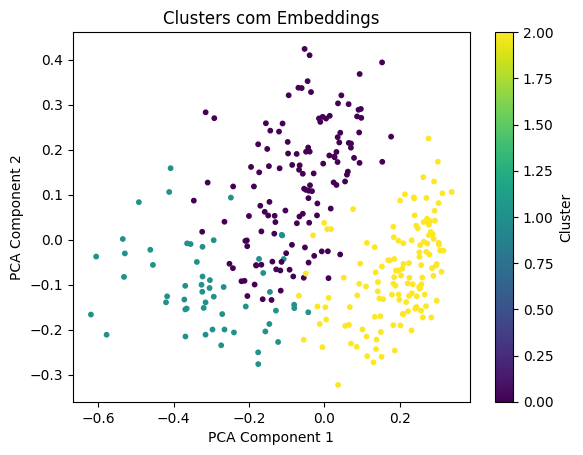

In [68]:
from sklearn.decomposition import PCA

# Reduzir dimensões para visualização
pca = PCA(n_components=2)
data_2d = pca.fit_transform(df['Text_Embedding'].to_list())
df['features'] = data_2d.tolist()
# Adicionar resultados ao DataFrame
df['Cluster'] = I.flatten()
df['Distance_to_Center'] = D.flatten()

# Plotar clusters
import matplotlib.pyplot as plt
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=df['Cluster'], cmap='viridis', s=10)
plt.title('Clusters com Embeddings')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()


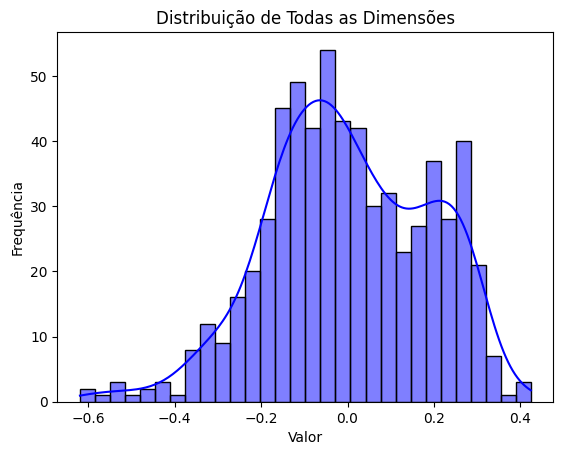

In [69]:
import seaborn as sns
# Achatar todos os valores em uma única lista
flattened_values = [value for sublist in df['features'] for value in sublist]
sns.histplot(flattened_values, kde=True, bins=30, color='blue')
plt.title('Distribuição de Todas as Dimensões')
plt.xlabel('Valor')
plt.ylabel('Frequência')
plt.show()

